/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[[0.69721647 0.47275452 0.49705219 0.32995293]
 [0.27824221 0.52127175 0.74221965 0.3283936 ]
 [0.41701363 0.36106855 0.8074869  0.31738127]
 [0.24447244 0.7323779  0.53186447 0.34106765]]
[[ 0.4207194   0.53994189  0.66941273  0.34066921]
 [-0.41665671 -0.31604787 -0.4281595  -0.14941544]
 [-0.8957264   0.21317767  0.2753727  -0.02111156]
 [-0.14376858  0.8142592  -0.68996846  0.07029463]]
[[-0.38478985 -0.41524197 -0.63049469 -0.34802433]
 [-0.05488685  0.2444054   0.87215911  0.19799043]
 [-0.69126855 -0.59269988  0.27664532 -0.19874484]
 [-0.69977522  0.74492013 -0.36350615  0.03310489]]


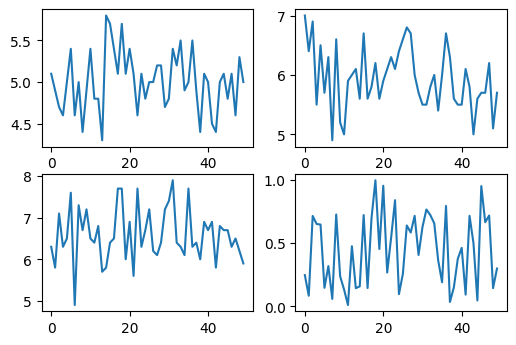

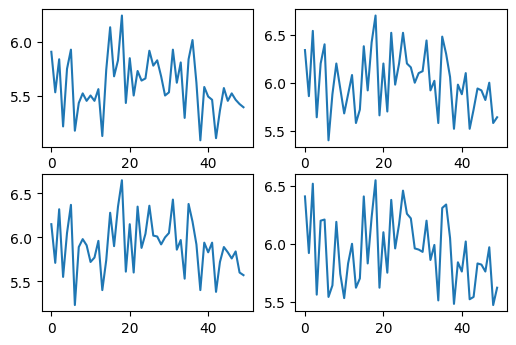

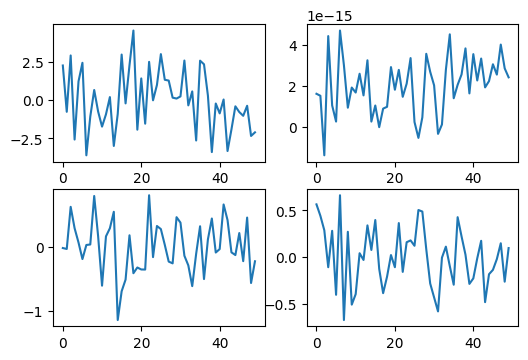

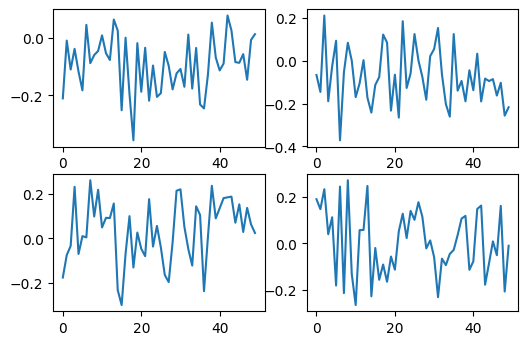

In [2]:
'''
Author: Boyang Zhang
date 4/3/2021
purpose: to compare the performance between PCA and ICA on dataset.
Contacts: boyang2@ualberta.ca
'''



import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import FastICA

def PCA(features):
  mean_x = np.mean(features.T, axis = 1).reshape(4, 1)
  std_x = np.std(features.T, axis = 1).reshape(4, 1)
  x = (features.T - mean_x)/std_x
  #print(x)
  cov_x = np.cov(x)
  w, v = np.linalg.eig(cov_x)
  #print('eigenvalues: ')
  #print(w)
  #print('eigenvectors: ')
  #print(v)
  transform_1_x = x.T.dot(v[:,0])
  transform_2_x = x.T.dot(v[:,1])
  transform_3_x = x.T.dot(v[:,2])
  transform_4_x = x.T.dot(v[:,3])
  #print(v)
  #m = np.array([v[0],v[1]])
  m = v[:,0:4]
  #print(m)
  #m = m.T
  #print(m)
  result = x.T.dot(m)
  return result

dataset = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,sep=',')


'''
with open('dataset.txt','r') as fp:
  dataset=[]
  i=0
  while True:
    str=fp.readline()
    if str=="":
      break
    dataset.append([])
    s1,s2,s3,s4=str.split()[0:4]
    dataset[i].append(float(s1[1:]))
    dataset[i].append(float(s2))
    dataset[i].append(float(s3))
    dataset[i].append(float(s4[0:len(s4)-1]))
    i=i+1

'''
features=np.array(dataset)
setosa = features[0:50]
versicolor = features[50:100]
virginica = features[100:150]

x=range(50)
choice=3
dtset=np.zeros((50,4))
if choice==3:
  dtset[:,0]=features[0:50,choice-3]
  dtset[:,1]=features[50:100,choice-3]
  dtset[:,2]=features[100:150,choice-3]
  dtset[:,3]=np.random.random(size=(50))
  wight_matrix=np.array([[0.5,0.3,0.2,0.0],[0.2,0.4,0.4,0.0],[0.3,0.3,0.4,0.0],[0.2,0.5,0.3,0.0]])

plt.figure('dateset',dpi=100)
plt.title('Origin Iris dataset')
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

plt.sca(ax1)
plt.plot(x,dtset.T[0])
plt.sca(ax2)
plt.plot(x,dtset.T[1])
plt.sca(ax3)
plt.plot(x,dtset.T[2])
plt.sca(ax4)
plt.plot(x,dtset.T[3])

xdat=np.dot(dtset,wight_matrix.T)
plt.figure('x date',dpi=100)
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

plt.sca(ax1)
plt.plot(x,xdat.T[0])
plt.sca(ax2)
plt.plot(x,xdat.T[1])
plt.sca(ax3)
plt.plot(x,xdat.T[2])
plt.sca(ax4)
plt.plot(x,xdat.T[3])

result= PCA(xdat)
xpca = result[0:50]
plt.figure('PCA',dpi=100)
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

plt.sca(ax1)
plt.plot(x,xpca.T[0])
plt.sca(ax2)
plt.plot(x,xpca.T[1])
plt.sca(ax3)
plt.plot(x,xpca.T[2])
plt.sca(ax4)
plt.plot(x,xpca.T[3])

ICA = FastICA(n_components=4)
ICA_result = ICA.fit(xdat).transform(xdat)
xica = ICA_result[0:50]

plt.figure('ICA',dpi=100)
plt.title
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

plt.sca(ax1)
plt.plot(x,xica.T[0])
plt.sca(ax2)
plt.plot(x,xica.T[1])
plt.sca(ax3)
plt.plot(x,xica.T[2])
plt.sca(ax4)
plt.plot(x,xica.T[3])


corr_setdt=np.corrcoef(dtset,xdat,rowvar=False)
print(corr_setdt[4:8,0:4])
corr_setpca=np.corrcoef(dtset,xpca,rowvar=False)
print(corr_setpca[4:8,0:4])
corr_setica=np.corrcoef(dtset,xica,rowvar=False)
print(corr_setica[4:8,0:4])

plt.show()

